In [1]:
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import cv2

Загрузим исходное изображение и покажем его:

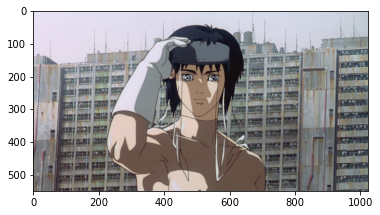

In [2]:
img = image.load_img("input_image.jpg")
plt.imshow(img)

Преобразуем исходное изображение в матрицу с разменостью (x, y, 3):

In [3]:
image_matrix = image.img_to_array(img)

Данная фунция основана на афинных пеобразованиях. Для матрицы определяем модули синуса и косинуса угла. Далее находим, сколько нам нужно добавить к разрешению по высоте и ширине, ибо изображение перестаёт "влезать" в прошлую матрицу. Ну а далее применяем афинное пребразование и получаем новое изображение.

In [4]:
def rotate_image(mat, angle):
    'Rotates the image matrix and cue points by a given angle'
    height, width = mat.shape[:2]
    image_center = (width/2, height/2)
    rotation_mat = cv2.getRotationMatrix2D(image_center, angle, 1.)

    abs_cos = abs(rotation_mat[0,0]) 
    abs_sin = abs(rotation_mat[0,1])
    bound_w = int(height * abs_sin + width * abs_cos)
    bound_h = int(height * abs_cos + width * abs_sin)
    rotation_mat[0, 2] += bound_w/2 - image_center[0]
    rotation_mat[1, 2] += bound_h/2 - image_center[1]
    
    rotated_mat = cv2.warpAffine(mat, rotation_mat, (bound_w, bound_h))
    
    return rotated_mat

Применим вышеописанную функцию:

In [5]:
output_img_matrix = rotate_image(image_matrix, 30)

Преобразуем полученную матрицу в изображение и покажем её:

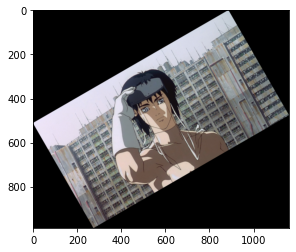

In [6]:
output_image = image.array_to_img(output_img_matrix)
plt.imshow(output_image)

Сохраним полученное изображение:

In [7]:
output_image.save("rotation_augmentation_output.jpg")